<a href="https://colab.research.google.com/github/arpan2233/Deep-Learning/blob/main/LPGKernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#numpy and matplotlib are already installed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


In [2]:
# Generate dataset
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)
print("Linear Kernel Accuracy:", svm_linear.score(X_test, y_test))


Linear Kernel Accuracy: 0.9


In [4]:
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_poly.fit(X_train, y_train)
print("Polynomial Kernel Accuracy:", svm_poly.score(X_test, y_test))


Polynomial Kernel Accuracy: 0.925


In [5]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
print("Gaussian (RBF) Kernel Accuracy:", svm_rbf.score(X_test, y_test))


Gaussian (RBF) Kernel Accuracy: 0.975


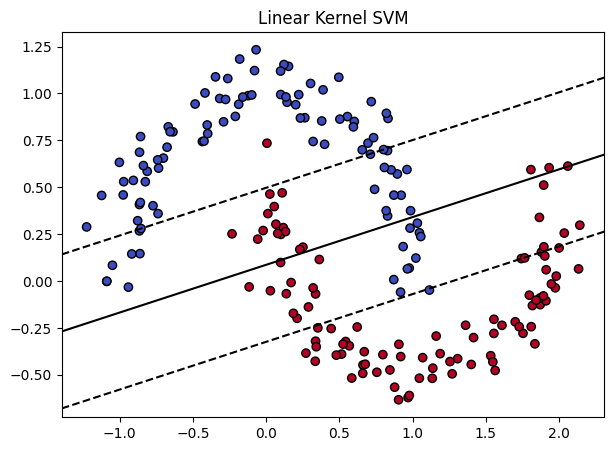

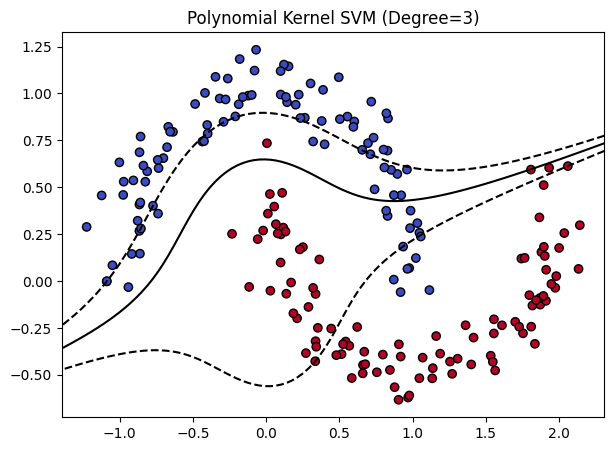

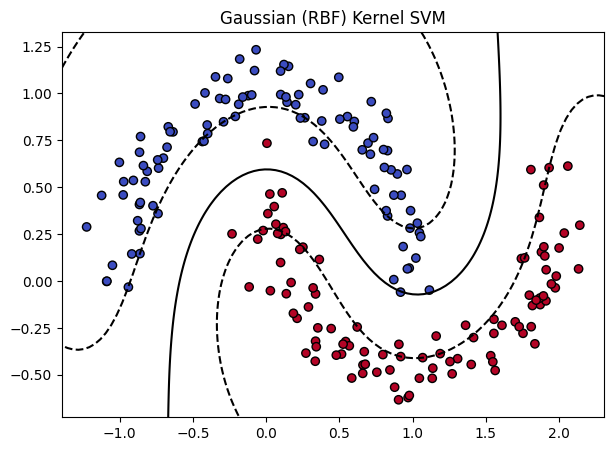

In [6]:
def plot_svm_boundary(model, X, y, title):
    plt.figure(figsize=(7,5))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))

    # Get model predictions
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contour(xx, yy, Z, colors='black', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    plt.title(title)
    plt.show()

# Plot for Linear Kernel
plot_svm_boundary(svm_linear, X, y, "Linear Kernel SVM")

# Plot for Polynomial Kernel
plot_svm_boundary(svm_poly, X, y, "Polynomial Kernel SVM (Degree=3)")

# Plot for Gaussian (RBF) Kernel
plot_svm_boundary(svm_rbf, X, y, "Gaussian (RBF) Kernel SVM")
